### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Somando apenas o preço das vendas, sem considerar as parcelas
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()

# Mostrar os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

# Faturamento total de todas as lojas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


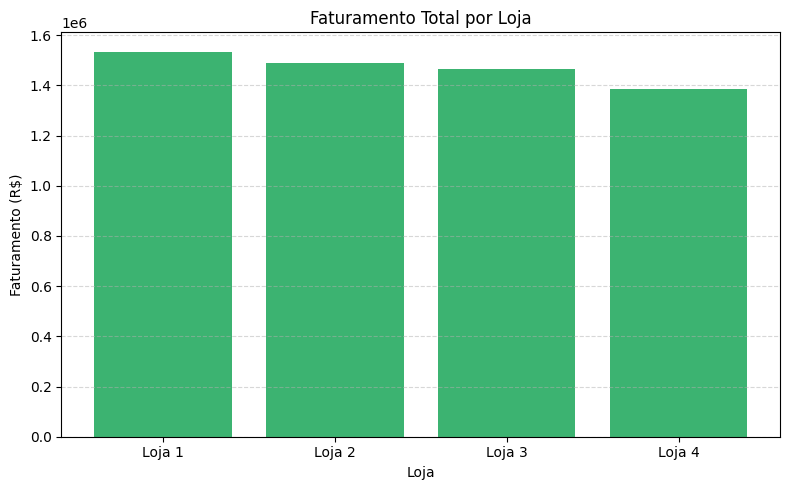

In [ ]:
import matplotlib.pyplot as plt

# Faturamento total por loja
faturamentos = [
    loja['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color='mediumseagreen')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na Loja {numero}:")
    print(vendas)

vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

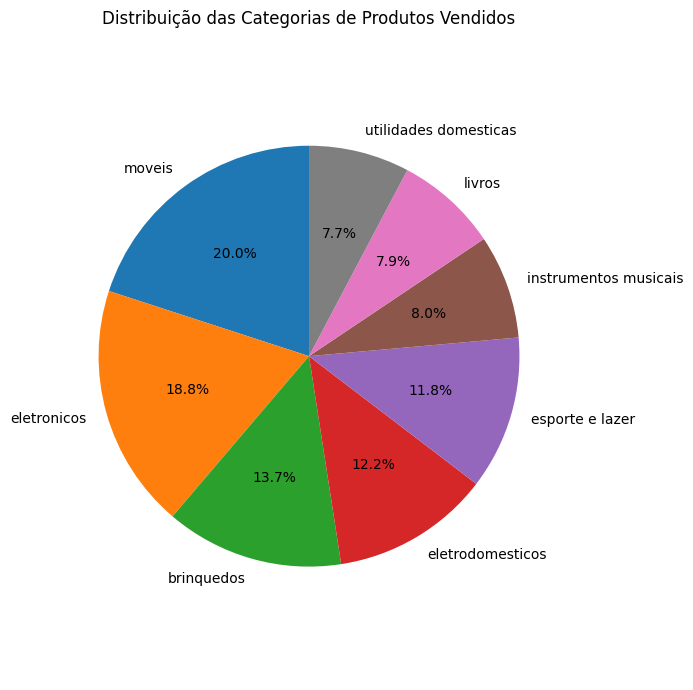

In [ ]:
# Usando os dados da loja inteira (ou pode usar uma loja específica)
categorias = pd.concat([loja, loja2, loja3, loja4])
vendas_categorias = categorias['Categoria do Produto'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(vendas_categorias, labels=vendas_categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Categorias de Produtos Vendidos')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Função para calcular e mostrar a média de avaliação de uma loja
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].astype(float).mean()
    print(f"Avaliação média da Loja {numero}: {media:.2f}")

# Chamando a função para cada loja
avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


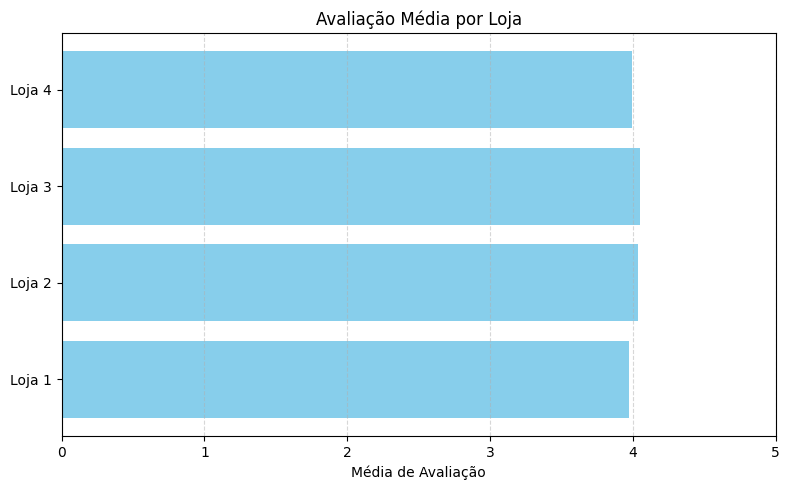

In [ ]:
# Média de avaliação por loja
avaliacoes = [
    loja['Avaliação da compra'].mean(),
    loja2['Avaliação da compra'].mean(),
    loja3['Avaliação da compra'].mean(),
    loja4['Avaliação da compra'].mean()
]

plt.figure(figsize=(8,5))
plt.barh(lojas, avaliacoes, color='skyblue')
plt.title('Avaliação Média por Loja')
plt.xlabel('Média de Avaliação')
plt.xlim(0,5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos




In [ ]:
# Função para exibir os 3 produtos mais e menos vendidos com vendas e faturamento
def top_produtos(loja, numero):
    # Contar quantas vezes cada produto foi vendido
    contagem = loja['Produto'].value_counts()

    # Calcular o faturamento total por produto
    faturamento = loja.groupby('Produto')['Preço'].sum()

    # Criar DataFrame com ambas as informações
    resumo = pd.DataFrame({
        'Quantidade de Vendas': contagem,
        'Faturamento Total': faturamento
    })

    # Ordenar do mais vendido ao menos
    resumo_ordenado = resumo.sort_values(by='Quantidade de Vendas', ascending=False)

    print(f"\n Loja {numero} - Top 3 mais vendidos:")
    print(resumo_ordenado.head(3))

    print(f"\n Loja {numero} - Top 3 menos vendidos:")
    print(resumo_ordenado.tail(3))

# Chamando a função para cada loja
top_produtos(loja, 1)
top_produtos(loja2, 2)
top_produtos(loja3, 3)
top_produtos(loja4, 4)


 Loja 1 - Top 3 mais vendidos:
               Quantidade de Vendas  Faturamento Total
Produto                                               
TV Led UHD 4K                    60          189534.28
Micro-ondas                      60           46348.89
Guarda roupas                    60           39282.78

 Loja 1 - Top 3 menos vendidos:
                   Quantidade de Vendas  Faturamento Total
Produto                                                   
Panela de pressão                    35            3505.71
Celular ABXY                         33           43534.47
Headset                              33            6307.71

 Loja 2 - Top 3 mais vendidos:
                          Quantidade de Vendas  Faturamento Total
Produto                                                          
Iniciando em programação                    65            4169.96
Micro-ondas                                 62           48256.37
Bateria                                     61           61566.87

 L

# 5. Frete Médio por Loja


In [ ]:
# Calculando o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].astype(float).mean()
frete_medio_loja2 = loja2['Frete'].astype(float).mean()
frete_medio_loja3 = loja3['Frete'].astype(float).mean()
frete_medio_loja4 = loja4['Frete'].astype(float).mean()

# Mostrando os resultados
print(f"Frete médio Loja 1: R${frete_medio_loja1:.2f}")
print(f"Frete médio Loja 2: R${frete_medio_loja2:.2f}")
print(f"Frete médio Loja 3: R${frete_medio_loja3:.2f}")
print(f"Frete médio Loja 4: R${frete_medio_loja4:.2f}")

Frete médio Loja 1: R$34.69
Frete médio Loja 2: R$33.62
Frete médio Loja 3: R$33.07
Frete médio Loja 4: R$31.28


# Análise das Lojas do Senhor João

## Objetivo

O objetivo dessa análise é ajudar o Senhor João a decidir qual das quatro lojas da rede Alura Store vender, com base em dados nos dados de vendas, desempenho comercial e avaliação dos clientes. A decisão foi tomada a partir da análise dos seguintes fatores:

- Faturamento total das lojas  
- Categorias de produtos mais e menos vendidas  
- Média das avaliações dos clientes  
- Produtos mais e menos vendidos  
- Frete médio por loja  

## Análises Realizadas

### 1. Faturamento Total por Loja
A análise do faturamento total mostrou que:

- A **Loja 1** foi a que mais faturou, seguida da Loja 2.
- A **Loja 4 apresentou o menor faturamento**, cerca de R$150 mil abaixo da penúltima colocada.

### 2. Vendas por Categoria de Produto
As categorias mais vendidas variaram entre as lojas, mas de forma geral:

- **Eletrônicos** e **Eletrodomésticos** foram as categorias mais populares.
- Algumas lojas apresentaram baixa diversidade de categorias, o que pode afetar a atratividade para clientes.
- Apesar de “Móveis” aparecer com bons números, especialmente na Loja 3, ela **não superou eletrônicos em nenhuma loja** individualmente.


### 3. Média das Avaliações por Loja
As médias de avaliação de clientes mostraram que:

- A **Loja 3 recebeu as melhores avaliações**, mostrando maior satisfação do cliente.
- A **Loja 1 teve a pior avaliação média**, apesar de seu alto faturamento.

### 4. Produtos Mais e Menos Vendidos
- Em todas as lojas, houve **produtos com vendas muito concentradas**, o que pode representar dependência de poucos itens.

Exemplos por loja:

- Loja 1: TV 4K, Micro-ondas, Guarda-roupas
- Loja 2: Livro “Iniciando em programação”, Micro-ondas, Bateria
- Loja 3: Kit Banquetas, Mesa de jantar, Cama King
- Loja 4: Cama box, Faqueiro, Cama King

### 5. Frete Médio por Loja
- A Loja 1 teve o frete médio mais alto, o que pode afastar clientes sensíveis ao custo de entrega.
- A Loja 4 teve o frete médio mais baixo, sendo mais competitiva nesse aspecto.


## Conclusão e Recomendação Final

Com base em todos os dados analisados, **a recomendação é que o Senhor João venda a Loja 4**.

### Justificativa:

- **Menor faturamento** entre as quatro lojas.
- **Produtos de alto valor com baixa saída**, indicando estoque parado.
- Apesar do **menor custo de frete**, a loja não se destaca em nenhuma outra métrica.
- **Avaliação dos clientes apenas mediana (4.00)**.
- **Faturamento em categorias principais** como eletrônicos e eletrodomésticos foi menor do que nas outras lojas.

As demais lojas (principalmente Loja 1 e Loja 3) demonstram **bom desempenho em faturamento, avaliação e variedade de produtos vendidos**, sendo mais vantajosas para manter na operação.
